In [1]:
import os
import shutil
from time import sleep
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
from tensorflow import logging
logging.set_verbosity(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import numpy as np

from batchflow.models.tf import EfficientNetB0, EfficientNetB1, EfficientNetB2, MobileNet_v2

from batchflow import Pipeline, B, V, C, D, ImagesBatch
from batchflow.opensets import Imagenette320
from batchflow.research import Option, Research

%env CUDA_VISIBLE_DEVICES='6,7'

env: CUDA_VISIBLE_DEVICES='6,7'


In [2]:
data = Imagenette160(batch_class=ImagesBatch, bar=True)


100%|██████████| 2/2 [00:33<00:00, 16.73s/it]


In [3]:
new_res = 160
im_shape = (new_res, new_res, 3)

model_config = {
    'inputs/images/shape': im_shape,
    'inputs/labels/classes': D('num_classes'),
    'initial_block/inputs': 'images',
    'loss': 'ce'
}

train_ppl = (data.train.p
                  .crop('center', (new_res, new_res))
                  .init_variable('loss_history', default=[])
                  .init_model('dynamic', EfficientNetB0, 'model', config=model_config)
                  .to_array()
                  .train_model('model', fetches='loss', images=B('images'), labels=B('labels'), 
                               save_to=V('loss_history', mode='a'))
                  .run_later(64, shuffle=True, n_iters=10, drop_last=True))

In [4]:
train_ppl = train_ppl.run(bar=True)

100%|██████████| 10/10 [02:39<00:00, 15.93s/it]


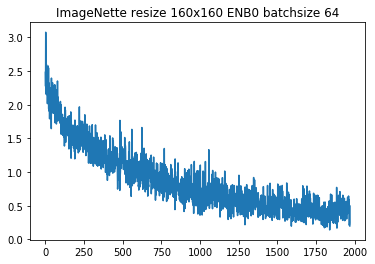

In [5]:
from matplotlib import pyplot as plt
plt.plot(train_ppl.get_variable('loss_history'))
plt.title('ImageNette resize 160x160 ENB0 batchsize 64');

In [8]:
test_pipeline = (data.test.p
                 .resize((new_res, new_res))
                 .import_model('model', train_ppl)
                 .init_variable('predictions') 
                 .init_variable('metrics') 
                 .to_array()
                 .predict_model('model', fetches='predictions', 
                                images=B('images'),
                                save_to=V('predictions'))
                 .gather_metrics('class', targets=B('labels'), predictions=V('predictions'),
                                 fmt='logits', axis=-1, save_to=V('metrics', mode='u'))
                 .run(64, shuffle=True, n_epochs=1, drop_last=False, bar=True)
)

100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


In [9]:
metrics = test_pipeline.get_variable('metrics')

metrics.evaluate('accuracy')

0.784394250513347

In [11]:
from batchflow.opensets import ImageWoof160
data = ImageWoof160(batch_class=ImagesBatch, bar=True)


100%|██████████| 2/2 [00:13<00:00,  6.86s/it]


In [12]:
new_res = 160 
im_shape = (new_res, new_res, 3)

model_config = {
    'inputs/images/shape': im_shape,
    'inputs/labels/classes': D('num_classes'),
    'initial_block/inputs': 'images',
    'loss': 'ce'
}

train_ppl = (data.train.p
                  .resize((new_res, new_res))
                  .init_variable('loss_history', default=[])
                  .init_model('dynamic', EfficientNetB0, 'model', config=model_config)
                  .to_array()
                  .train_model('model', fetches='loss', images=B('images'), labels=B('labels'), 
                               save_to=V('loss_history', mode='a'))
                  .run_later(64, shuffle=True, n_epochs=10, drop_last=True))

In [13]:
train_ppl = train_ppl.run(bar=True)

100%|██████████| 1920/1920 [2:50:07<00:00,  5.32s/it]  


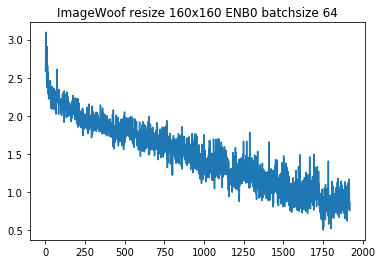

In [14]:
plt.plot(train_ppl.get_variable('loss_history'))
plt.title('ImageWoof resize 160x160 ENB0 batchsize 64');

In [17]:
test_pipeline = (data.test.p
                 .resize((new_res, new_res))
                 .import_model('model', train_ppl)
                 .init_variable('predictions') 
                 .init_variable('metrics') 
                 .to_array()
                 .predict_model('model', fetches='predictions', 
                                images=B('images'),
                                save_to=V('predictions'))
                 .gather_metrics('class', targets=B('labels'), predictions=V('predictions'),
                                 fmt='logits', axis=-1, save_to=V('metrics', mode='u'))
                 .run(64, shuffle=True, n_epochs=1, drop_last=False, bar=True)
)

100%|██████████| 8/8 [00:04<00:00,  2.00it/s]


In [18]:
metrics = test_pipeline.get_variable('metrics')

metrics.evaluate('accuracy')

0.5412474849094567

In [19]:
data = Imagenette160(batch_class=ImagesBatch, bar=True)


 50%|█████     | 1/2 [00:08<00:08,  8.73s/it]


In [20]:
new_res = 160 #EfficientNetB0.resolution
im_shape = (new_res, new_res, 3)

model_config = {
    'inputs/images/shape': im_shape,
    'inputs/labels/classes': D('num_classes'),
    'initial_block/inputs': 'images',
    'loss': 'ce'
}

train_ppl = (data.train.p
                  .resize((new_res, new_res))
                  .init_variable('loss_history', default=[])
                  .init_model('dynamic', EfficientNetB1, 'model', config=model_config)
                  .to_array()
                  .train_model('model', fetches='loss', images=B('images'), labels=B('labels'), 
                               save_to=V('loss_history', mode='a'))
                  .run_later(64, shuffle=True, n_epochs=10, drop_last=True))

In [21]:
train_ppl = train_ppl.run(bar=True)

100%|██████████| 1970/1970 [2:51:36<00:00,  5.23s/it]  


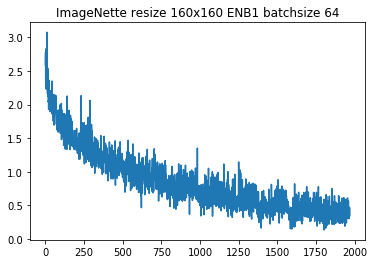

In [22]:
from matplotlib import pyplot as plt
plt.plot(train_ppl.get_variable('loss_history'))
plt.title('ImageNette resize 160x160 ENB1 batchsize 64');

In [23]:
test_pipeline = (data.test.p
                 .resize((new_res, new_res))
                 .import_model('model', train_ppl)
                 .init_variable('predictions') 
                 .init_variable('metrics') 
                 .to_array()
                 .predict_model('model', fetches='predictions', 
                                images=B('images'),
                                save_to=V('predictions'))
                 .gather_metrics('class', targets=B('labels'), predictions=V('predictions'),
                                 fmt='logits', axis=-1, save_to=V('metrics', mode='u'))
                 .run(64, shuffle=True, n_epochs=1, drop_last=False, bar=True)
)

100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


In [24]:
metrics = test_pipeline.get_variable('metrics')

metrics.evaluate('accuracy')

0.7741273100616016